<a href="https://colab.research.google.com/github/NetoRibeiro/DATA8001Assignment1/blob/main/R00206995_A1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA8001 - Assignment 1

### Student Name: Neto Ribeiro
### Student ID: R00206995

## 1. Libraries

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

# you custom data8001 lib
from lib import R00206995_util as util

## 2. Assignment Variables

In [3]:
STUDENT_ID = 'R00206995'

R00206995_A1_Q1 = 0.0
R00206995_A1_Q2 = {'make':'', 'units':0}
R00206995_A1_Q3 = {'make':'', 'model':'', 'units':0}
R00206995_A1_Q4 = 0.0
R00206995_A1_Q5 = {'make':'', 'price':0}

## 3. Load & Clean Data

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df_R00206995 = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/R00206995/data/R00206995_processed.csv')

def concat_columns(col1, col2, delimited):
  try:
    cols = f'{col1}{delimited}{col2}'
    return cols
  except Exception as ex:
    raise Exception(f'Error when concatenate:: {ex}')
# df_R00206995 = util.data_etl(STUDENT_ID)
print(df_R00206995.shape)
df_R00206995.head(2)

(3800, 11)


,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
0,192-D-2504,2019-07-06,2019,7,DUBLIN,FORD,MONDEO,HATCHBACK,WHITE,C,31263.0
1,202-D-948,2020-07-06,2020,7,DUBLIN,TOYOTA,COROLLA,SALOON,WHITE,B,30574.0


## 4. Visualise Answers

#### Question 1 - What was the median price of cars in 2018 (tax band A & B) in Cork and Galway?

In [5]:
R00206995_A1_Q1 = df_R00206995.loc[((df_R00206995['year'] == 2018) & ((df_R00206995['tax_band'] == "A") | (df_R00206995['tax_band'] == "B")) & ((df_R00206995['county'] == "CORK") | (df_R00206995['county'] == "GALWAY")))]['price'].describe()[5]
print(f'Answer Q1:\t{R00206995_A1_Q1:.2f}')

Answer Q1:	35814.00


#### Question 2 - What was the most popular MAKE of car in Dublin with a 192-D-XXXX reg plate across tax Bands C and D?

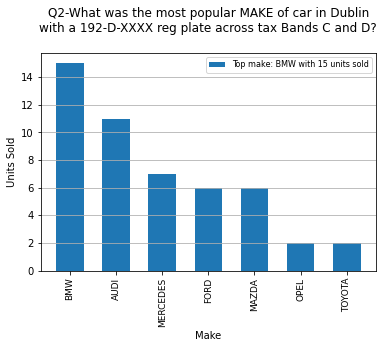

In [6]:
df_a1_q2 = df_R00206995.loc[((df_R00206995['year'] == 2019) & (df_R00206995['month'] > 6) & ((df_R00206995['tax_band'] == "C") | (df_R00206995['tax_band'] == "D")) & (df_R00206995['county'] == "DUBLIN"))].copy()
df_a1_q2_gb = df_a1_q2.groupby(['make'], as_index=False).agg(
    units = pd.NamedAgg(column='make', aggfunc="count"),
    max_price = pd.NamedAgg(column='price', aggfunc=max)
)
df_a1_q2_gb.sort_values(by=['units', 'max_price'], ascending=False, inplace=True, ignore_index=True)
A1_Q2 = f'Top make: {df_a1_q2_gb["make"].iloc[0]} with {df_a1_q2_gb["units"].iloc[0]} units sold'

plt.bar(df_a1_q2_gb['make'],df_a1_q2_gb['units'], label=A1_Q2, align='center', width=0.6)
plt.grid(axis='y')
plt.title('Q2-What was the most popular MAKE of car in Dublin\n\
with a 192-D-XXXX reg plate across tax Bands C and D?\n', fontsize=12)
plt.legend(fontsize=8)
plt.xlabel("Make", fontsize=10)
plt.ylabel("Units Sold", fontsize=10)
plt.xticks(rotation=90, fontsize=9)
plt.show()

In [8]:
R00206995_A1_Q2 = df_a1_q2_gb[['make', 'units']].iloc[0]
print(f'Answer Q2:\tMake:{R00206995_A1_Q2["make"]}\t{R00206995_A1_Q2["units"]} units sold')

Answer Q2:	Make:BMW	15 units sold


#### Question 3 - What was the most popular Silver Saloon car (make & model) sold in Limerick & Waterford?

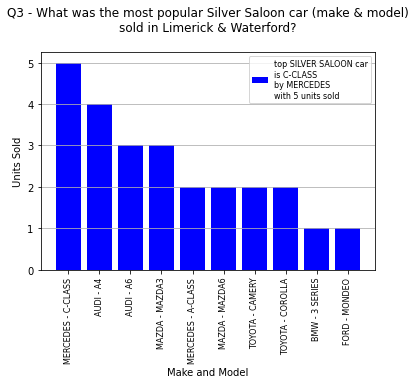

In [9]:
df_a1_q3 = df_R00206995.loc[((df_R00206995['colour'] == "SILVER") & (df_R00206995['type'] == "SALOON") & ((df_R00206995['county'] == "LIMERICK") | (df_R00206995['county'] == "WATERFORD")))].copy()
df_a1_q3['make-model'] = df_a1_q3.apply(lambda row: concat_columns(row['make'], row['model'], " - "), axis=1)
df_a1_q3_gb = df_a1_q3.groupby(['make-model', 'make', 'model', 'type', 'colour'], as_index=False).agg(
    units = pd.NamedAgg(column='make-model', aggfunc="count"),
    max_price = pd.NamedAgg(column='price', aggfunc=max)
)
df_a1_q3_gb.sort_values(by=['units', 'max_price'], ascending=False, inplace=True, ignore_index=True)
A1_Q3 = f'top {df_a1_q3_gb["colour"].iloc[0]} {df_a1_q3_gb["type"].iloc[0]} car\n\
is {df_a1_q3_gb["model"].iloc[0]}\n\
by {df_a1_q3_gb["make"].iloc[0]}\n\
with {df_a1_q3_gb["units"].iloc[0]} units sold'

plt.bar(df_a1_q3_gb['make-model'],df_a1_q3_gb['units'], label=A1_Q3, color='blue')
plt.grid(axis='y')
plt.legend(fontsize=8)
plt.xlabel("Make and Model")
plt.ylabel("Units Sold")
plt.xticks(rotation=90, fontsize=8)
plt.title('Q3 - What was the most popular Silver Saloon car (make & model)\n\
sold in Limerick & Waterford?\n', fontsize=12)
plt.show()

In [10]:
R00206995_A1_Q3 = df_a1_q3_gb[['make', 'model', 'units']].iloc[0]
print(f'Answer Q3:\tMake:{R00206995_A1_Q3["make"]}\tModel:{R00206995_A1_Q3["model"]}\t{R00206995_A1_Q3["units"]} units sold')

Answer Q3:	Make:MERCEDES	Model:C-CLASS	5 units sold


#### Question 4 - What was the percentage increase / decrease in total SUV car sales (units & price) outside of Dublin of 201 vs 192 reg cars?

In [11]:
df_a1_q4_192 = df_R00206995.loc[((df_R00206995['year'] == 2019) & (df_R00206995['month'] > 6 ) & (df_R00206995['type'] == "SUV") & (df_R00206995['county'] != "DUBLIN"))].copy()
df_a1_q4_201 = df_R00206995.loc[((df_R00206995['year'] == 2020) & (df_R00206995['month'] < 7 ) & (df_R00206995['type'] == "SUV") & (df_R00206995['county'] != "DUBLIN"))].copy()

df_a1_q4_192_gb = df_a1_q4_192.groupby(['year'], as_index=False).agg(
    units = pd.NamedAgg(column='car_reg', aggfunc="count"),
    sum_price = pd.NamedAgg(column='price', aggfunc=sum)
)

df_a1_q4_201_gb = df_a1_q4_201.groupby(['year'], as_index=False).agg(
    units = pd.NamedAgg(column='car_reg', aggfunc="count"),
    sum_price = pd.NamedAgg(column='price', aggfunc=sum)
)
a1_q4_year = (df_a1_q4_192_gb, df_a1_q4_201_gb)
df_a1_q4_year = pd.concat(a1_q4_year)
df_a1_q4_year['year'] = df_a1_q4_year['year'].astype(str)

years_unit = []
years_price = []

for row in df_a1_q4_year.itertuples():
  years_unit.append(row.units)
  years_price.append(row.sum_price)

A1_Q4_units = ((years_unit[1] - years_unit[0]) / years_unit[0] ) * 100
A1_Q4_price = ((years_price[1] - years_price[0]) / years_price[0] ) * 100
A1_Q4 = ( A1_Q4_units + A1_Q4_price ) / 2



In [12]:
df_a1_q4_year

,year,units,sum_price
0,2019,46,2547544.0
0,2020,97,4949055.0


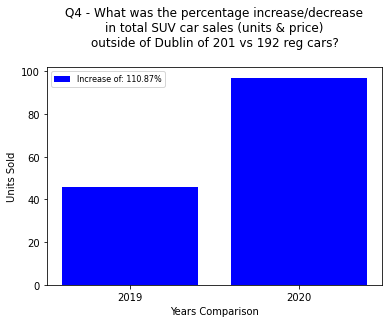

In [13]:
unit_label = np.where(A1_Q4_units >= 0, f'Increase of: {A1_Q4_units:.2f}%', f'Decrease of: {A1_Q4_units:.2f}%')
plt.bar(df_a1_q4_year['year'],df_a1_q4_year['units'], label=unit_label, color='blue')
plt.legend(fontsize=8)
plt.xlabel("Years Comparison", fontsize=10)
plt.ylabel("Units Sold", fontsize=10)
plt.title('Q4 - What was the percentage increase/decrease\n\
in total SUV car sales (units & price)\n\
outside of Dublin of 201 vs 192 reg cars?\n', fontsize=12)
plt.show()

In [14]:
R00206995_A1_Q4 = A1_Q4
print(f'Answer Q4:\t{R00206995_A1_Q4:.2f}')

Answer Q4:	102.57


#### Question 5 - What was the most popular make and avg. price of white SUV in Munster in 2020 valued at or above €90K?
**NOTE:** If there is only 1 car for each make, choose the most expensive car make!

In [15]:
def is_munster(county):
  list_counties_munster = ['CLARE', 'CORK', 'KERRY', 'LIMERICK', 'TIPPERARY', 'WATERFORD']
  if county.upper() in list_counties_munster:
    return True
  else:
    return False

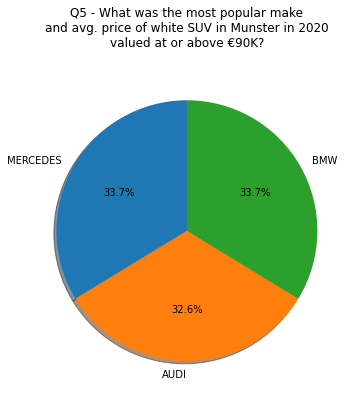

In [16]:
df_R00206995['is_munster'] = df_R00206995['county'].apply(lambda row: is_munster(row))
df_a1_q5 = df_R00206995.loc[((df_R00206995['year'] == 2020) & (df_R00206995['price'] >= 90000) & (df_R00206995['type'] == "SUV") & (df_R00206995['is_munster'] == True))].copy()
df_R00206995.drop('is_munster', axis=1, inplace=True)
df_a1_q5_gb = df_a1_q5.groupby(['make'], as_index=False).agg(
    units = pd.NamedAgg(column='car_reg', aggfunc="count"),
    price = pd.NamedAgg(column='price', aggfunc='mean'),
    max_price = pd.NamedAgg(column='price', aggfunc=max)
)

df_a1_q5_gb.sort_values(by=['units', 'max_price'], ascending=False, inplace=True, ignore_index=True)

A1_Q5 = f'Top make in Munster: {df_a1_q5_gb["make"].iloc[0]}\n\
with the avg price of {df_a1_q5_gb["price"].iloc[0]:.2f}'

plt.figure(figsize=(8,6))
slices = df_a1_q5_gb['price']
categories = df_a1_q5_gb['make']
# For different colors: https://matplotlib.org/examples/color/named_colors.html
#cols = ['red', 'green', 'orange']

# Plotting the pie-chart.
plt.pie(slices, 
        labels=categories,
        startangle = 90,
        shadow=True,
        autopct = '%1.1f%%'
       )

plt.title(f'Q5 - What was the most popular make\n\
and avg. price of white SUV in Munster in 2020\n\
valued at or above €90K?\n', fontsize=12)
plt.show()

In [17]:
R00206995_A1_Q5 = df_a1_q5_gb[['make', 'price']].iloc[0]
print(f'Answer Q5:\tMake:{R00206995_A1_Q5["make"]}\tAvg. Price €{R00206995_A1_Q5["price"]:.2f}')

Answer Q5:	Make:MERCEDES	Avg. Price €111060.70


## 5. Load Model
1. What is the model accuracy?
1. What are the best model features?
1. What is the model equation?
1. What transformations were used (if any)?

In [ ]:
# load testing dataset
# df_test = pd.read_csv('')
model_R00206995 = util.load_run_model(STUDENT_ID, df_test)